라이브러리 호출

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


데이터 가져오기

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Train Data Set

In [3]:
train_images.shape


(60000, 28, 28)

Label 보기

In [4]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Test Data Set

In [5]:
test_images.shape

(10000, 28, 28)

Train Image 보기

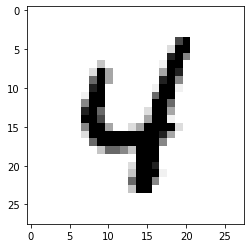

In [6]:
plt.imshow(train_images[53421], cmap="Greys")

신경망 모델 정의

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))


모델 컴파일

In [8]:
model.compile(optimizer='rmsprop',      #Optimizer
                loss='mse',             #Loss Function
                metrics=['accuracy'])


데이터 전처리 (255.0으로 나누기)

In [9]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0


Labeling

In [10]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


학습

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 18s 35ms/step - loss: 0.0130 - accuracy: 0.9203
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0044 - accuracy: 0.9735
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0030 - accuracy: 0.9823
Epoch 4/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0022 - accuracy: 0.9868
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.0018 - accuracy: 0.9898


테스트

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


313/313 [==============================] - 3s 7ms/step - loss: 0.0032 - accuracy: 0.9809
테스트 정확도: 0.98089998960495




```
# 코드로 형식 지정됨
```

실제 이미지로 테스트하기

Saving s.png to s.png
{'s.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05F\x00\x00\x02u\x08\x02\x00\x00\x00\x9aj\xbd\xbb\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00?\x8fIDATx^\xed\xdd\x07|]g}\xf0qkK\xb6\xb6<\xe4=b\xc7q\x9c\xc4I\x1c\x87@ \x04BB\n\x85\x97YF\xdfR\xde\xd2\x01-\x85\x96R(\xb4tP(#e\xb4@\x19e\x94\x96\xb2\xa1\x90\x92\xb4\x84\x1d\x08\t\x19N\x9ce\x1c\xcfx\xca\x92\xade\rK\xba\xf7\xea=\x92\x9e\x90\xc4q\x96#Y\xf7<\xe7\xfb\xed\xed\xcd\xf3?W\xb2o>M-\xff\xeeY%\xa3\xa3\xa33R\xa2P\x18-$F\x0b\x83\x83C\x9d\x87{\xbb{\xfa\x8e\xf4\x0e\xf4\xf7\x1f=zthd$\x97\xcf\x17\x92\xaf)++\xad\xa8\xac\xa8\xae\xae\x9c5\xb3\xba\xae~fccmss}MMUiI\xe9\xb8\x92\x89_\n\x00\x00\x00\xd2.\x1dI\x9fO\x14\n]]G\xf6\xef;\xd4\xd6\xd69008{vc\xd2\xea\r\r\xb5\xb5\xb55I\xb1WV\x96\x97\x95\x95M|\xe5\xd0P.i\xfe\xbe\xbe\x81\xde\xde\xfe\xce\xce\xde\x8e\x8e\xee\xe4k\xe6\xb56/\\0\xbb\xb1\xa9\xae\xac\xb4t\xe2+\x0

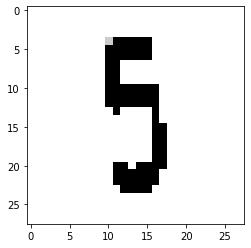

In [15]:
import cv2 as cv
from google.colab import files

test_file = files.upload()
print(test_file)
filename = next(iter(test_file))
print (filename)

image = cv.imread(filename, cv.IMREAD_GRAYSCALE)

image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()


추정값 출력

In [16]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())


1/1 [==============================] - 0s 90ms/step
추정된 숫자= 5


Directory에서 png file 지우기

In [17]:
!ls -al


total 68
drwxr-xr-x 1 root root  4096 Nov  1 10:07  .
drwxr-xr-x 1 root root  4096 Nov  1 10:02  ..
-rw-r--r-- 1 root root 16467 Nov  1 10:05 '제목 없음 (1).png'
drwxr-xr-x 4 root root  4096 Oct 28 13:36  .config
-rw-r--r-- 1 root root 14479 Nov  1 10:05 '제목 없음.png'
drwxr-xr-x 1 root root  4096 Oct 28 13:37  sample_data
-rw-r--r-- 1 root root 16378 Nov  1 10:07  s.png


In [18]:
!ls
!rm *.png
!ls

'제목 없음 (1).png'  '제목 없음.png'   sample_data   s.png
sample_data


In [19]:
!cd sam*
!pwd
!ls -al

/content
total 16
drwxr-xr-x 1 root root 4096 Nov  1 10:07 .
drwxr-xr-x 1 root root 4096 Nov  1 10:02 ..
drwxr-xr-x 4 root root 4096 Oct 28 13:36 .config
drwxr-xr-x 1 root root 4096 Oct 28 13:37 sample_data
